<a href="https://colab.research.google.com/github/Scart-Lead/KNN-Built-From-Scratch-Numpy/blob/main/WE_Time_Series_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastdtw import fastdtw
import pandas as pd
import numpy as np
from google.colab import drive
from scipy.spatial.distance import euclidean

In [ ]:
# Mount the Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
permits = pd.read_excel('/content/drive/MyDrive/buildingpermits.xlsx')

In [ ]:
construct_volume = pd.read_excel('/content/drive/MyDrive/construction_production.xlsx')

                                            GEO/TIME   2012  ...   2020   2021
0          European Union - 27 countries (from 2020)  111.2  ...  121.6      :
1          European Union - 28 countries (2013-2020)  104.5  ...      :      :
2              Euro area - 19 countries  (from 2015)    118  ...  120.2      :
3                                            Belgium    102  ...  120.1      :
4                                           Bulgaria   61.5  ...  170.5      :
5                                            Czechia     90  ...  139.5      :
6                                            Denmark     53  ...  120.8      :
7   Germany (until 1990 former territory of the FRG)   80.3  ...    122      :
8                                            Estonia   54.3  ...  158.1      :
9                                            Ireland   47.9  ...  341.4      :
10                                            Greece  224.9  ...    278      :
11                                             Spain

In [ ]:
construct_volume.head()

,GEO/TIME,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union - 27 countries (from 2020),101.8,99,99.8,100,101.8,105.7,108.4,111,105.5,:
1,European Union - 28 countries (2013-2020),98,96.2,99,100,102.2,106.6,108.4,111.2,:,:
2,Euro area - 19 countries (from 2015),102.8,100.2,100.7,100,102.7,105.7,107.3,109.4,103.2,:
3,Belgium,106,102.9,102.4,100,100.9,101.5,103.1,102.8,94.4,:
4,Bulgaria,87.1,84,90.1,99.9,83.3,87.6,88.9,92.4,87.3,:


In [ ]:
## Transforming the data
dates = []
for col in permits.columns:
    dates.append(col)

del dates[0]
permits = permits.T

areas = permits.iloc[0]
areas = list(areas)


permits.columns = permits.iloc[0]

permits.head()

GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
2012,111.2,104.5,118,102,61.5,90,53,80.3,54.3,47.9,224.9,159.4,119.7,140.9,191.2,183.9,149.3,74.5,107.2,81.3,77.6,69.8,79.2,86.1,133.6,96.8,117.9,82.6,99.2,50.5,98.2,69.6,119.5,119.4,:,106.2,85.9,:
2013,93.3,91.7,97.4,107.1,71.1,84,50.9,90.1,54.6,55.2,128.8,86.6,106.5,110.2,124.4,129.5,188.1,88.3,90.8,59.2,68.5,48.9,90.4,72.4,86.9,96.6,117.6,81.9,83.2,63.5,97.9,83.3,110,77.3,:,76.2,93.6,66
2014,93.4,93.6,95.5,119.1,91.8,90.9,71.7,93.3,70.5,56.8,104.6,92.4,93.3,112.1,109,89.3,112.5,83,145.7,77.4,74.4,73.5,95.8,82.5,81.2,96.3,99.3,86.5,91.7,76,87.4,94.4,98.4,88.4,:,77.4,115,80.8
2015,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


In [ ]:
## Transforming the data

dates = []
for col in construct_volume.columns:
    dates.append(col)

del dates[0]

construct_vol = pd.DataFrame()
construct_vol = construct_volume.T


construct_vol.columns = construct_vol.iloc[0]




construct_vol.head()

GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
2012,101.8,98,102.8,106,87.1,96.2,92.2,99.1,106,77,91.5,82.5,104.3,115.3,121.7,157,84.8,79.6,101.2,78.8,78.1,96.5,103.1,107.4,136.3,98.4,100.2,93.5,96.9,93,88.6,99.6,86.3,85.8,51.4,91.7,102.3,:,95.3
2013,99,96.2,100.2,102.9,84,89.7,92,99,105.8,85.7,84,83.7,104.8,108.4,109.3,127.4,91,88.7,97.2,85.5,79.6,90.9,103.5,96.4,114.2,97.7,93.4,88.6,94.1,90.3,94.2,101,87.7,93.5,73.5,79.8,81,:,92.5
2014,99.8,99,100.7,102.4,90.1,93.5,95.9,101.9,103.6,92.7,97,98.2,102,100.9,101.9,99.8,100.6,103.6,100.8,97.1,92.5,93.3,101.7,100.2,103.2,91.3,108.2,84.6,94.5,91.8,98.6,103.6,96.3,92.9,71.1,83.8,83.2,:,98.3
2015,100,100,100,100,99.9,100,100.1,99.6,100,100,100,100.3,100,100.1,100,100,100,100,100,100,100,100.4,100,100,100,100.7,100,99.9,99.9,100,100,100,100,100.7,100,100,100.6,:,100


In [24]:
# Cleaning first row
permits = permits.iloc[1: , :]

permits.head()

GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
2013,93.3,91.7,97.4,107.1,71.1,84.0,50.9,90.1,54.6,55.2,128.8,86.6,106.5,110.2,124.4,129.5,188.1,88.3,90.8,59.2,68.5,48.9,90.4,72.4,86.9,96.6,117.6,81.9,83.2,63.5,97.9,83.3,110.0,77.3,0.0,76.2,93.6,66.0
2014,93.4,93.6,95.5,119.1,91.8,90.9,71.7,93.3,70.5,56.8,104.6,92.4,93.3,112.1,109.0,89.3,112.5,83.0,145.7,77.4,74.4,73.5,95.8,82.5,81.2,96.3,99.3,86.5,91.7,76.0,87.4,94.4,98.4,88.4,0.0,77.4,115.0,80.8
2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2016,115.0,113.3,113.4,111.4,105.2,104.2,130.2,115.6,107.7,122.3,103.5,123.7,114.8,133.1,103.9,114.1,116.8,121.8,120.6,257.1,190.2,97.7,117.2,112.2,136.5,98.8,109.2,116.4,125.3,123.6,116.5,104.8,100.4,126.9,614.6,126.0,112.2,106.6
2017,126.5,123.6,124.4,109.1,144.6,123.0,130.4,113.2,141.0,159.3,123.9,154.4,122.2,179.6,120.8,154.5,135.6,118.3,123.6,312.3,248.8,125.9,133.2,133.8,172.6,106.4,116.8,125.6,150.7,134.4,117.3,109.8,148.3,128.6,1083.3,168.9,156.4,116.4


In [25]:
permits.head(15)

GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
2013,93.3,91.7,97.4,107.1,71.1,84.0,50.9,90.1,54.6,55.2,128.8,86.6,106.5,110.2,124.4,129.5,188.1,88.3,90.8,59.2,68.5,48.9,90.4,72.4,86.9,96.6,117.6,81.9,83.2,63.5,97.9,83.3,110.0,77.3,0.0,76.2,93.6,66.0
2014,93.4,93.6,95.5,119.1,91.8,90.9,71.7,93.3,70.5,56.8,104.6,92.4,93.3,112.1,109.0,89.3,112.5,83.0,145.7,77.4,74.4,73.5,95.8,82.5,81.2,96.3,99.3,86.5,91.7,76.0,87.4,94.4,98.4,88.4,0.0,77.4,115.0,80.8
2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2016,115.0,113.3,113.4,111.4,105.2,104.2,130.2,115.6,107.7,122.3,103.5,123.7,114.8,133.1,103.9,114.1,116.8,121.8,120.6,257.1,190.2,97.7,117.2,112.2,136.5,98.8,109.2,116.4,125.3,123.6,116.5,104.8,100.4,126.9,614.6,126.0,112.2,106.6
2017,126.5,123.6,124.4,109.1,144.6,123.0,130.4,113.2,141.0,159.3,123.9,154.4,122.2,179.6,120.8,154.5,135.6,118.3,123.6,312.3,248.8,125.9,133.2,133.8,172.6,106.4,116.8,125.6,150.7,134.4,117.3,109.8,148.3,128.6,1083.3,168.9,156.4,116.4
2018,131.7,127.6,130.3,136.1,205.8,127.2,171.7,115.4,125.1,223.1,175.9,191.8,114.5,168.9,127.4,194.0,163.8,120.2,137.3,302.4,326.5,129.3,114.1,138.2,243.5,109.2,136.2,134.1,135.2,112.2,104.8,110.3,78.1,117.4,1583.3,184.8,74.5,122.1
2019,132.6,127.4,131.9,121.3,189.9,152.4,149.6,119.1,143.6,300.8,234.4,216.3,110.6,221.0,128.4,301.1,165.0,112.9,134.8,291.1,316.3,104.7,129.8,144.5,281.2,108.8,122.2,126.8,120.4,101.0,100.2,105.8,52.8,97.0,1500.0,238.6,35.6,139.6
2020,121.6,0.0,120.2,120.1,170.5,139.5,120.8,122.0,158.1,341.4,278.0,136.3,95.3,202.9,114.4,290.6,186.4,112.1,127.4,180.3,198.6,117.9,119.4,149.1,291.1,105.6,135.0,123.2,127.9,114.3,98.2,0.0,43.3,100.6,1350.0,256.2,61.9,147.6
2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.2,0.0,0.0,0.0,0.0,0.0,0.0,166.0


In [ ]:
# Cleaning first row
construct_vol = construct_vol.iloc[1: , :]

construct_vol.head()

GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,Switzerland,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
2012,101.8,98,102.8,106,87.1,96.2,92.2,99.1,106,77,91.5,82.5,104.3,115.3,121.7,157,84.8,79.6,101.2,78.8,78.1,96.5,103.1,107.4,136.3,98.4,100.2,93.5,96.9,93,88.6,99.6,86.3,85.8,51.4,91.7,102.3,:,95.3
2013,99,96.2,100.2,102.9,84,89.7,92,99,105.8,85.7,84,83.7,104.8,108.4,109.3,127.4,91,88.7,97.2,85.5,79.6,90.9,103.5,96.4,114.2,97.7,93.4,88.6,94.1,90.3,94.2,101,87.7,93.5,73.5,79.8,81,:,92.5
2014,99.8,99,100.7,102.4,90.1,93.5,95.9,101.9,103.6,92.7,97,98.2,102,100.9,101.9,99.8,100.6,103.6,100.8,97.1,92.5,93.3,101.7,100.2,103.2,91.3,108.2,84.6,94.5,91.8,98.6,103.6,96.3,92.9,71.1,83.8,83.2,:,98.3
2015,100,100,100,100,99.9,100,100.1,99.6,100,100,100,100.3,100,100.1,100,100,100,100,100,100,100,100.4,100,100,100,100.7,100,99.9,99.9,100,100,100,100,100.7,100,100,100.6,:,100
2016,101.8,102.2,102.7,100.9,83.3,94.2,104.3,105.2,104.6,109.8,106,105.1,99.7,103.6,99.9,120.7,83.4,90.6,103.3,81.1,108.4,107.8,102.3,85.9,96.2,96.3,88,89.1,105.4,103.3,103.6,99.3,104.1,130.7,107.2,105.1,108.5,:,98.1


In [ ]:
permits = permits.replace(":", 0)

construct_vol = construct_vol.replace(":", 0)



In [ ]:
permits.head()

GEO/TIME,European Union - 27 countries (from 2020),European Union - 28 countries (2013-2020),Euro area - 19 countries (from 2015),Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,Croatia,Italy,Cyprus,Latvia,Lithuania,Luxembourg,Hungary,Malta,Netherlands,Austria,Poland,Portugal,Romania,Slovenia,Slovakia,Finland,Sweden,Norway,United Kingdom,Montenegro,North Macedonia,Albania,Serbia,Turkey,Bosnia and Herzegovina
2012,111.2,104.5,118.0,102.0,61.5,90.0,53.0,80.3,54.3,47.9,224.9,159.4,119.7,140.9,191.2,183.9,149.3,74.5,107.2,81.3,77.6,69.8,79.2,86.1,133.6,96.8,117.9,82.6,99.2,50.5,98.2,69.6,119.5,119.4,0.0,106.2,85.9,0.0
2013,93.3,91.7,97.4,107.1,71.1,84.0,50.9,90.1,54.6,55.2,128.8,86.6,106.5,110.2,124.4,129.5,188.1,88.3,90.8,59.2,68.5,48.9,90.4,72.4,86.9,96.6,117.6,81.9,83.2,63.5,97.9,83.3,110.0,77.3,0.0,76.2,93.6,66.0
2014,93.4,93.6,95.5,119.1,91.8,90.9,71.7,93.3,70.5,56.8,104.6,92.4,93.3,112.1,109.0,89.3,112.5,83.0,145.7,77.4,74.4,73.5,95.8,82.5,81.2,96.3,99.3,86.5,91.7,76.0,87.4,94.4,98.4,88.4,0.0,77.4,115.0,80.8
2015,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2016,115.0,113.3,113.4,111.4,105.2,104.2,130.2,115.6,107.7,122.3,103.5,123.7,114.8,133.1,103.9,114.1,116.8,121.8,120.6,257.1,190.2,97.7,117.2,112.2,136.5,98.8,109.2,116.4,125.3,123.6,116.5,104.8,100.4,126.9,614.6,126.0,112.2,106.6


In [ ]:
n = len(permits)
n1 = len(construct_vol)

In [ ]:
# Importing stats for analysis
from scipy import stats

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib.backends.backend_pdf import PdfPages

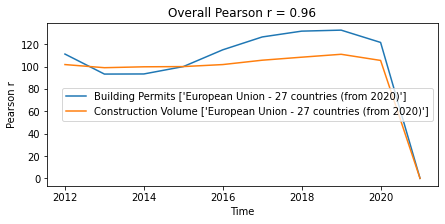

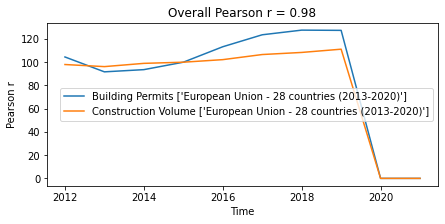

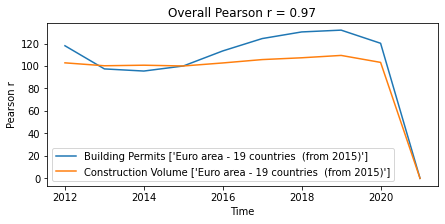

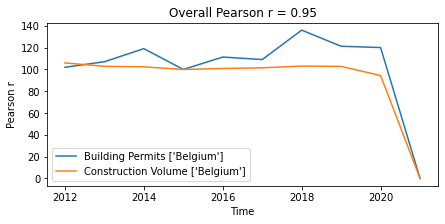

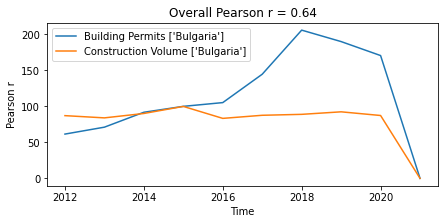

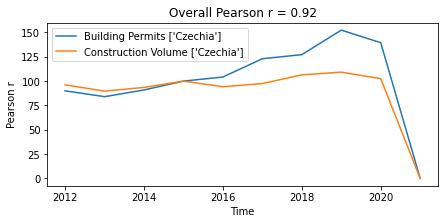

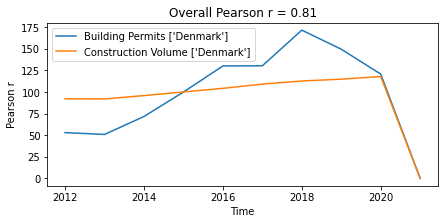

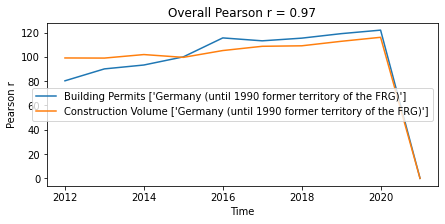

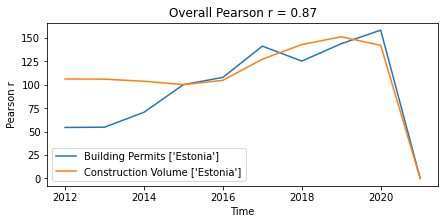

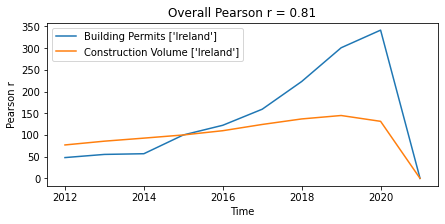

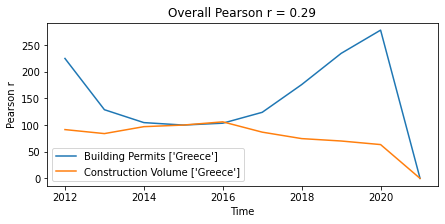

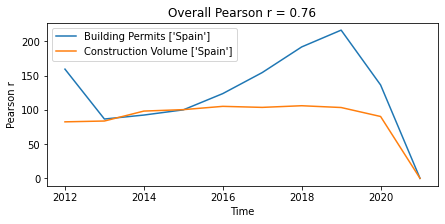

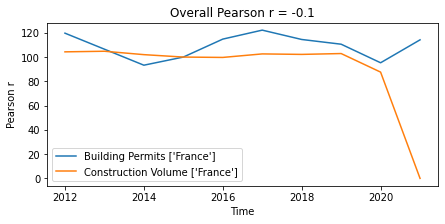

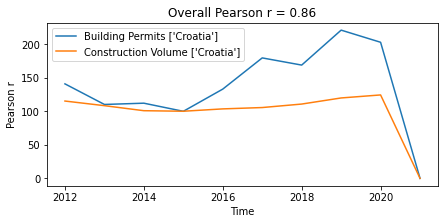

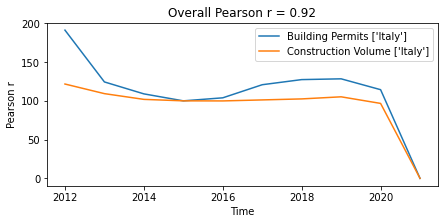

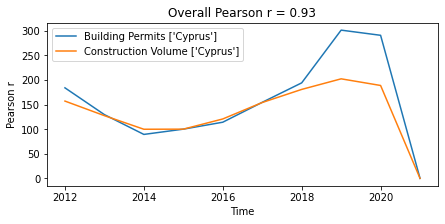

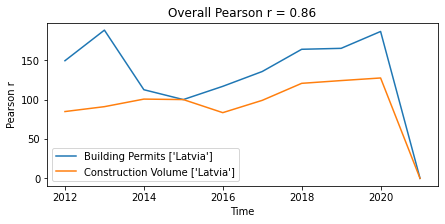

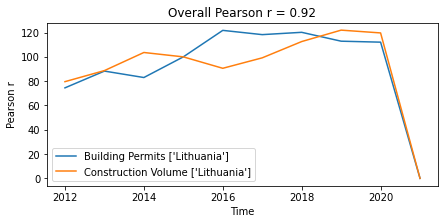

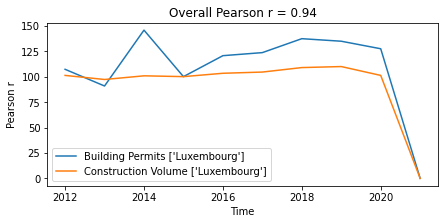

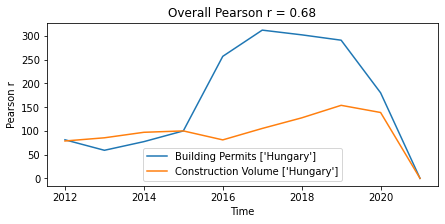

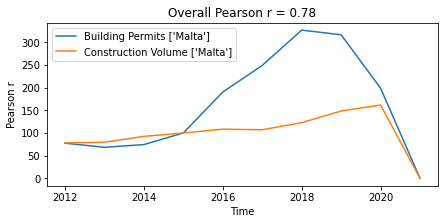

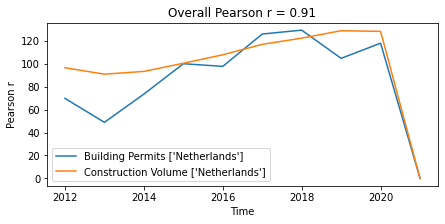

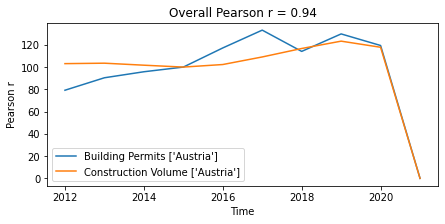

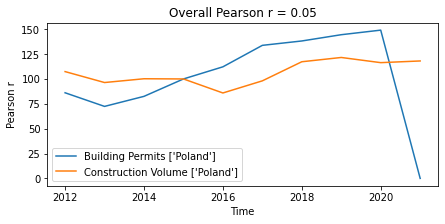

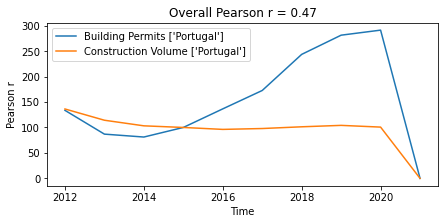

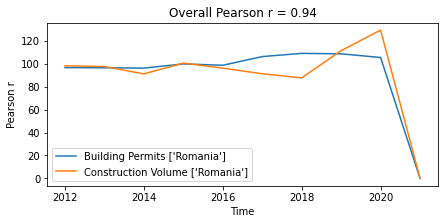

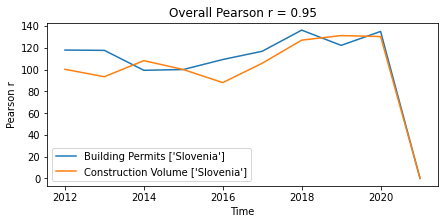

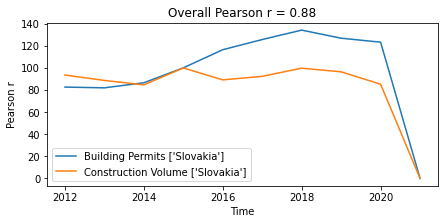

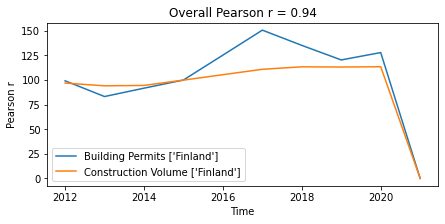

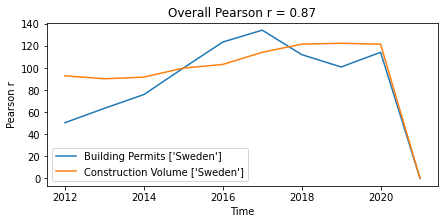

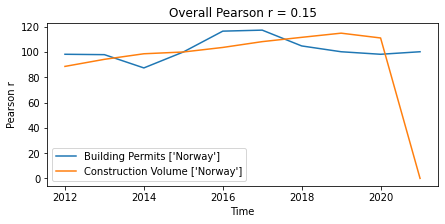

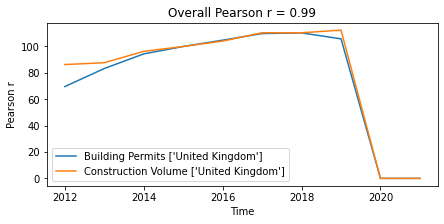

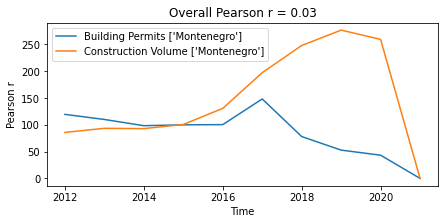

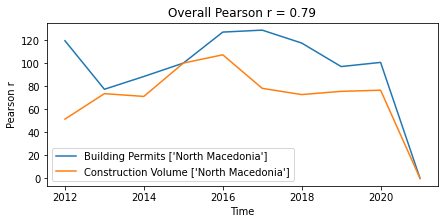

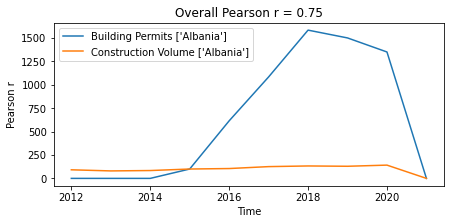

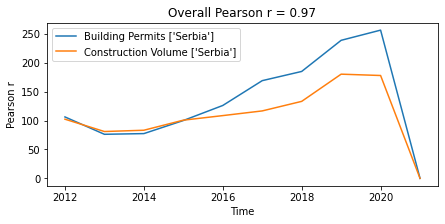

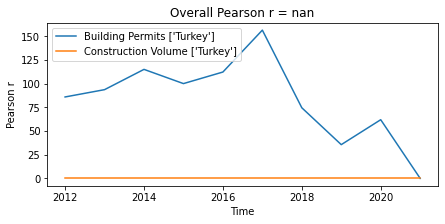

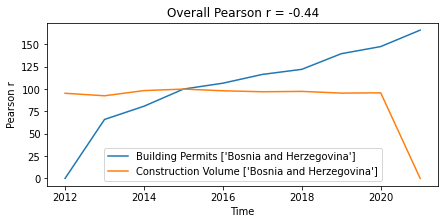

In [ ]:
## Plotting Pearson Coefficient for Building Permits + Construction Volume
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for i in areas:
  f, ax = plt.subplots(figsize=(7,3))
  permits[i].plot(ax=ax)
  construct_vol[i].plot(ax=ax)
  ax.legend([f"Building Permits {[i]}", f"Construction Volume {[i]}"])
  ax.set(xlabel='Time', ylabel = 'Pearson r')
  ax.set(title=f"Overall Pearson r = {np.round(R[i], 2)}");

def save_multi_image(filename):
   pp = PdfPages(filename)
   fig_nums = plt.get_fignums()
   figs = [plt.figure(n) for n in fig_nums]
   for fig in figs:
      fig.savefig(pp, format='pdf')
   pp.close()

save_multi_image(filename)

In [ ]:
filename = "correlation_analysis2.pdf"

save_multi_image(filename)

In [ ]:
R_1 = {k: v for k, v in sorted(R.items(), key=lambda item: item[1])}

print(R_1)

{'Bosnia and Herzegovina': -0.4392270050994763, 'France': -0.09910431042420054, 'Montenegro': 0.028163130828883887, 'Poland': 0.05385483405475383, 'Norway': 0.1520907453942472, 'Greece': 0.2890888361221058, 'Portugal': 0.4688743889446393, 'Bulgaria': 0.637626493529543, 'Hungary': 0.6817518462687416, 'Albania': 0.7474008958373304, 'Spain': 0.7635224001899046, 'Malta': 0.7763868430840808, 'North Macedonia': 0.7941501967472944, 'Denmark': 0.8064912545462452, 'Ireland': 0.8066258368942139, 'Croatia': 0.8581348097545346, 'Latvia': 0.8619213360389567, 'Estonia': 0.8667480336149245, 'Sweden': 0.8745297372644645, 'Slovakia': 0.8817262190718385, 'Netherlands': 0.9125102959925139, 'Czechia': 0.915632080074986, 'Lithuania': 0.9161359252776231, 'Italy': 0.9247688523974061, 'Cyprus': 0.9342676062800368, 'Romania': 0.9369204150778346, 'Luxembourg': 0.9371753771615663, 'Austria': 0.9371911130920834, 'Finland': 0.9444167779395094, 'Belgium': 0.9516226593447912, 'Slovenia': 0.9537112234875431, 'Europea

In [ ]:
# Plotting autocorreltation results
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
         Plot time series, its ACF and PACF, calculate Dickey-Fuller test
         
         y - timeseries
         lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax = ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        sm.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        sm.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local

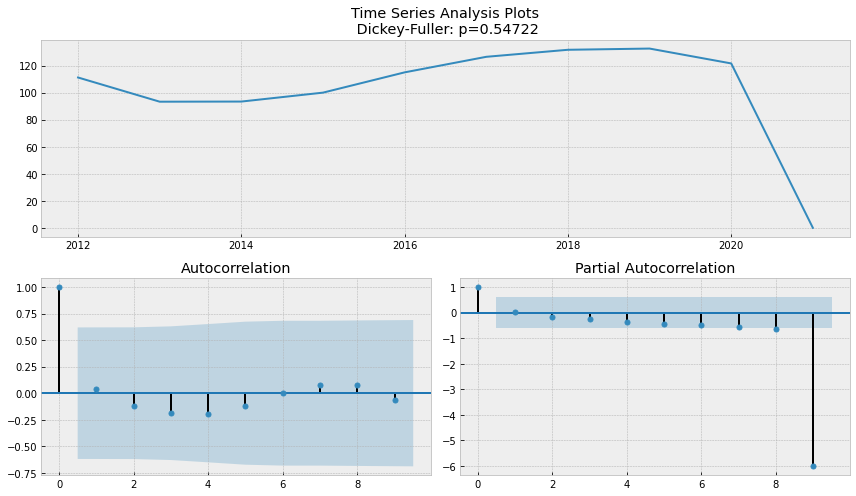

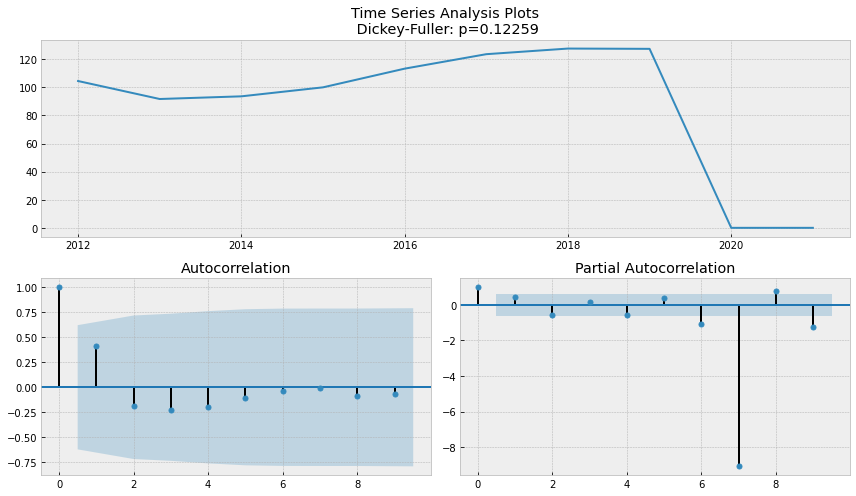

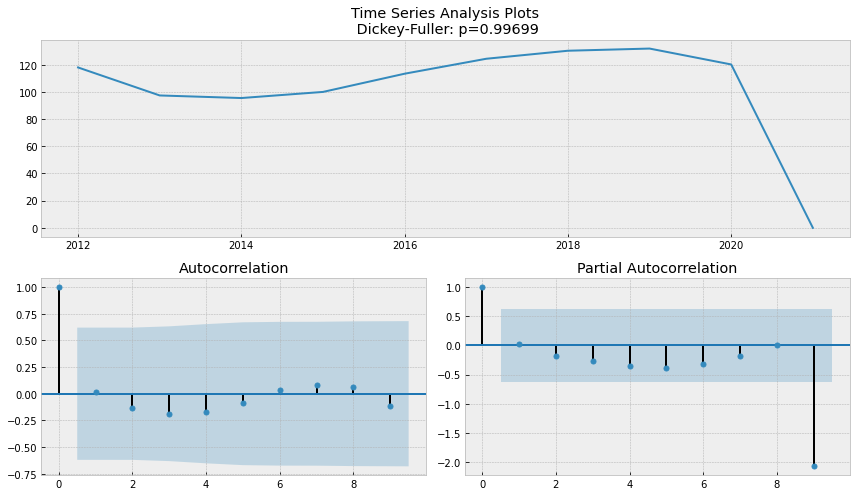

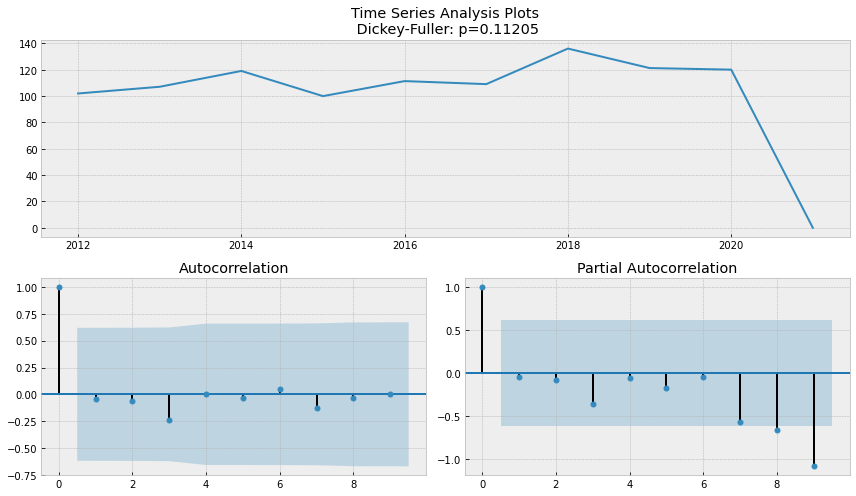

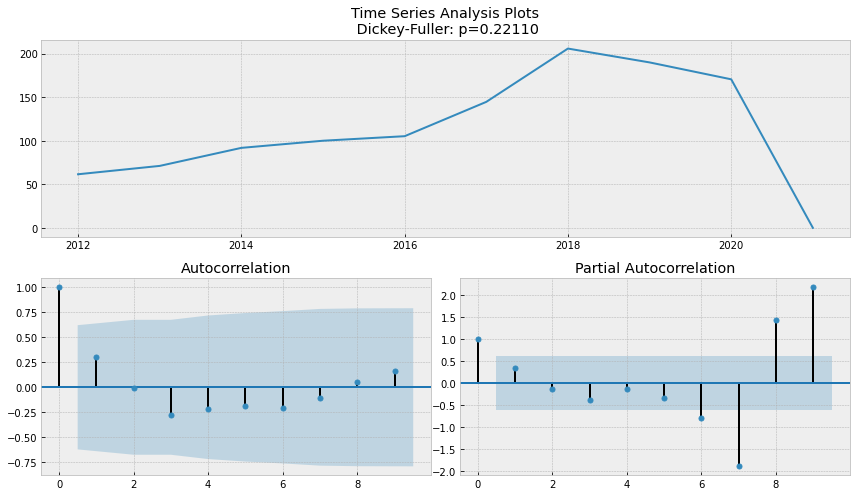

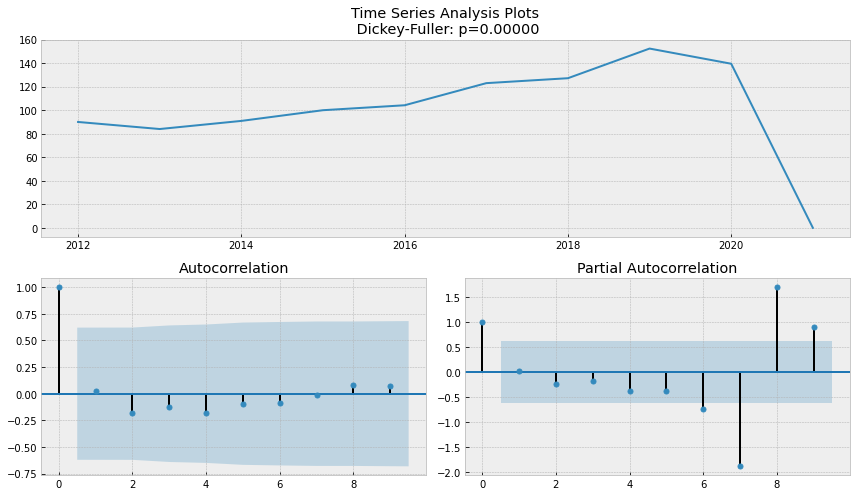

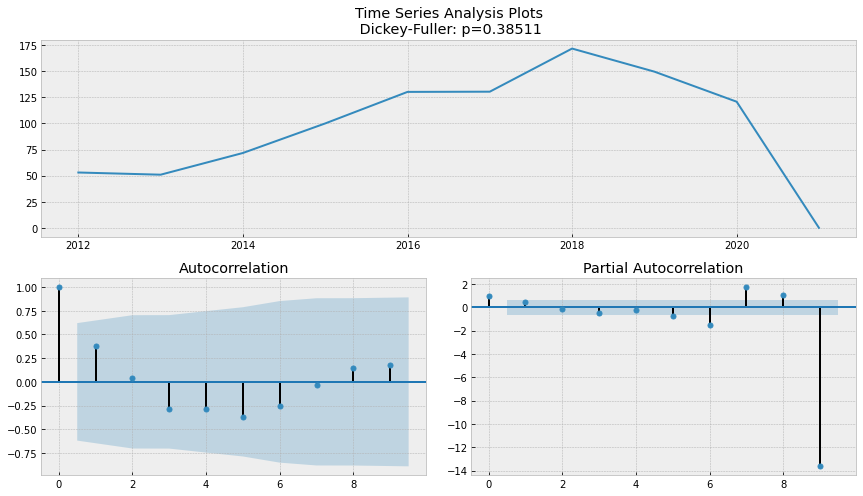

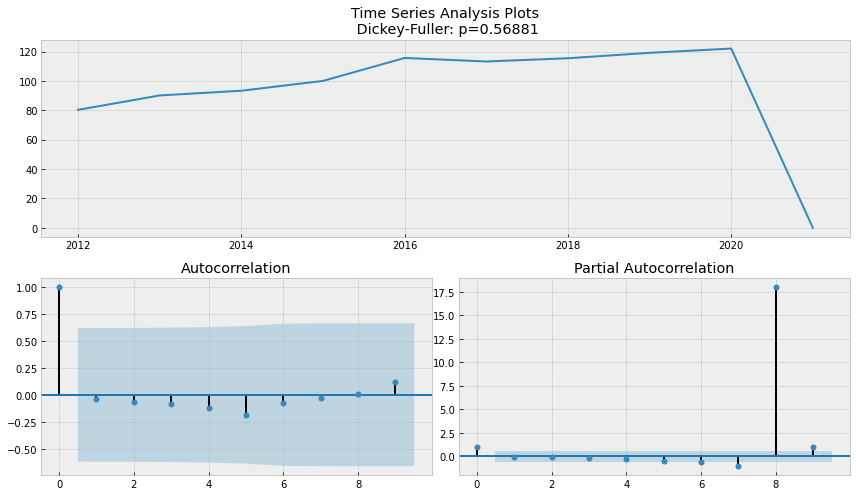

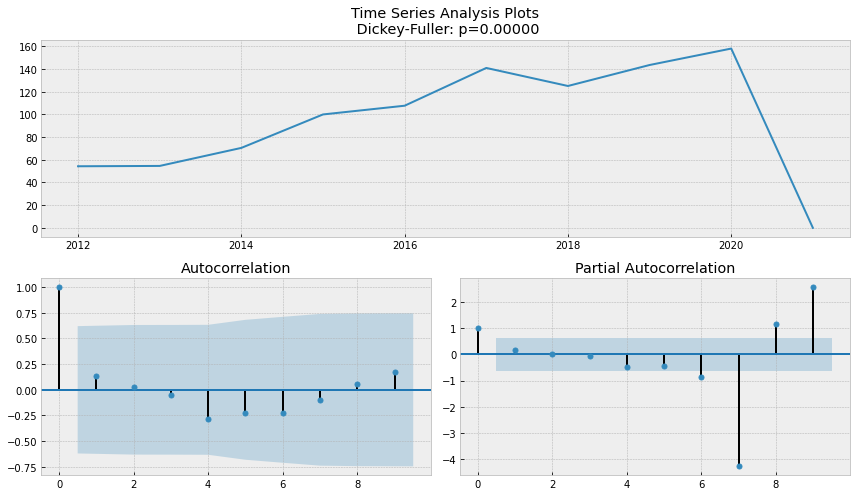

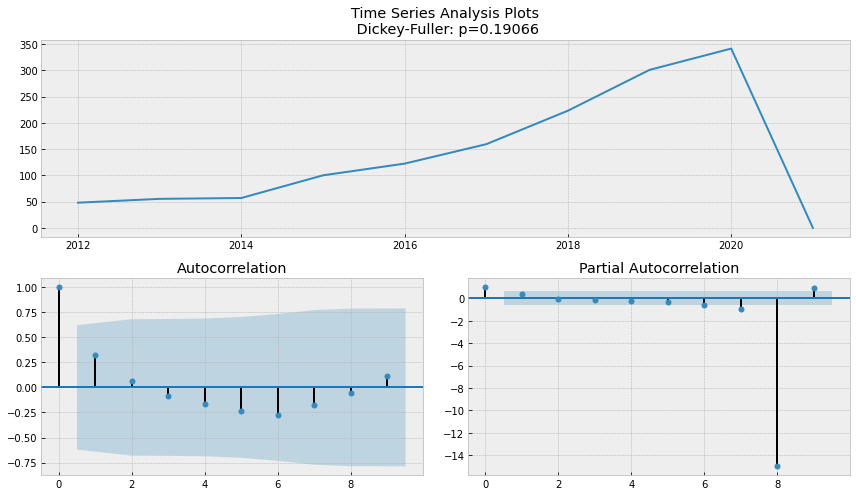

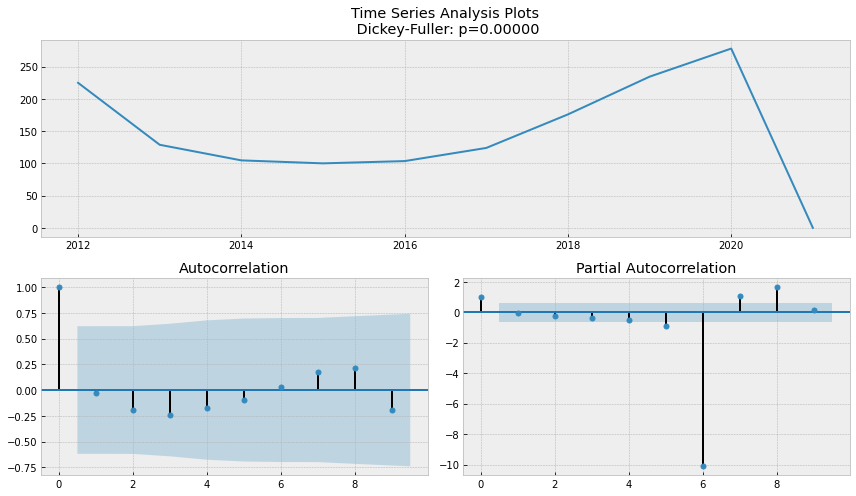

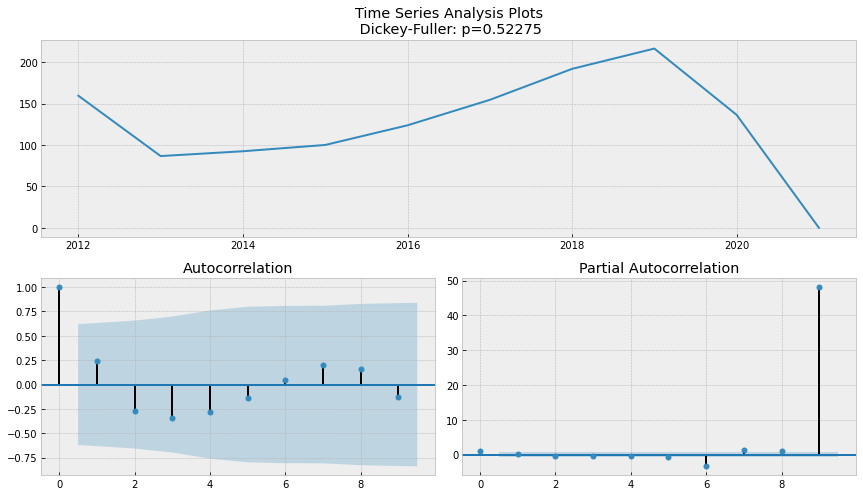

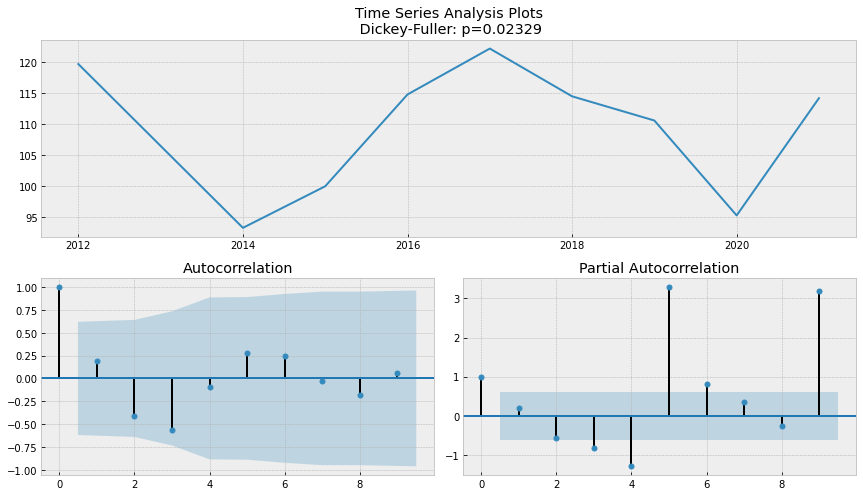

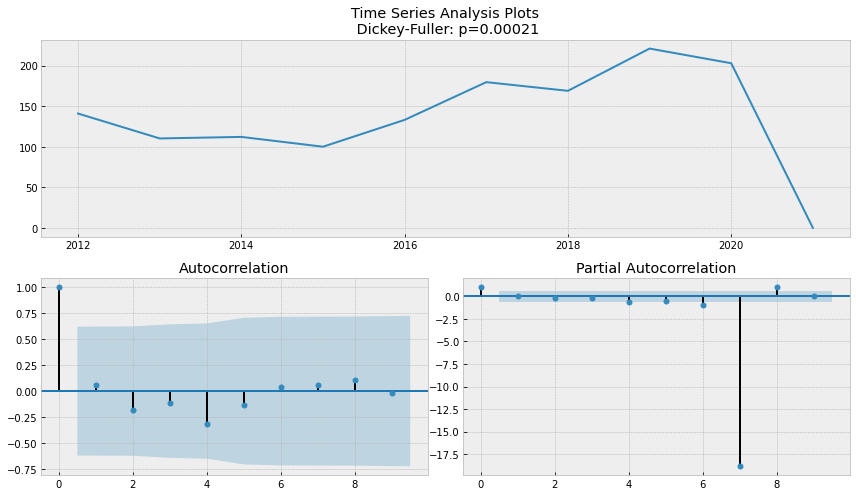

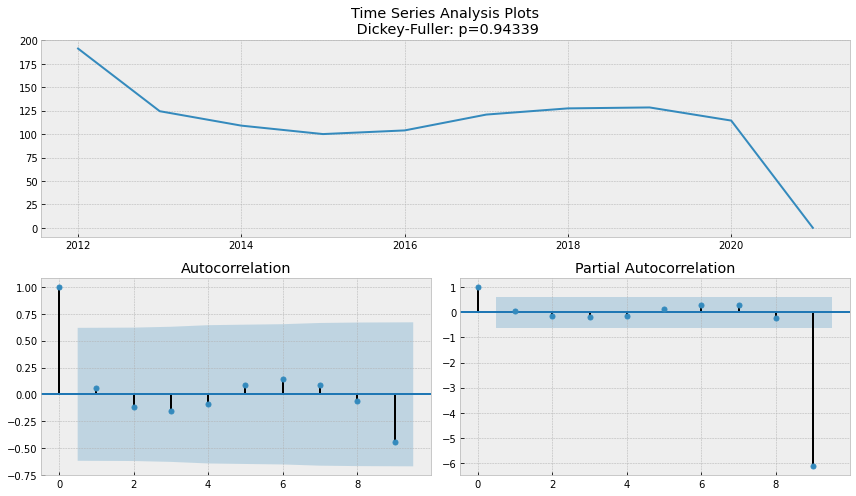

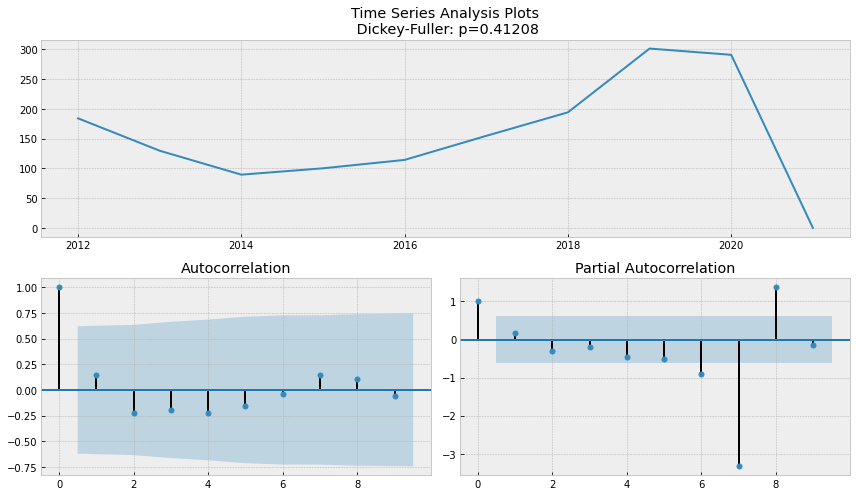

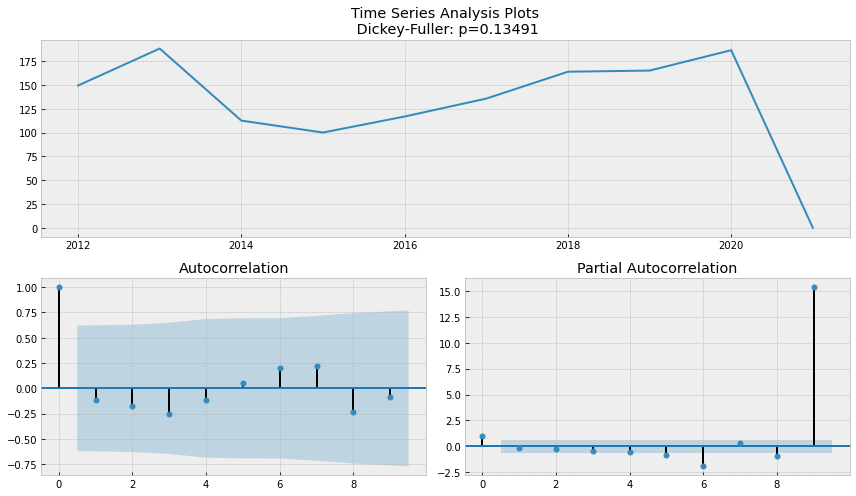

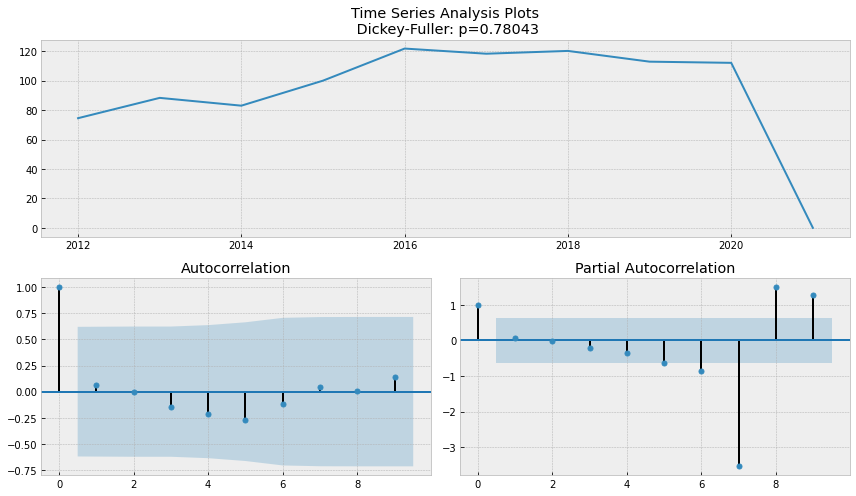

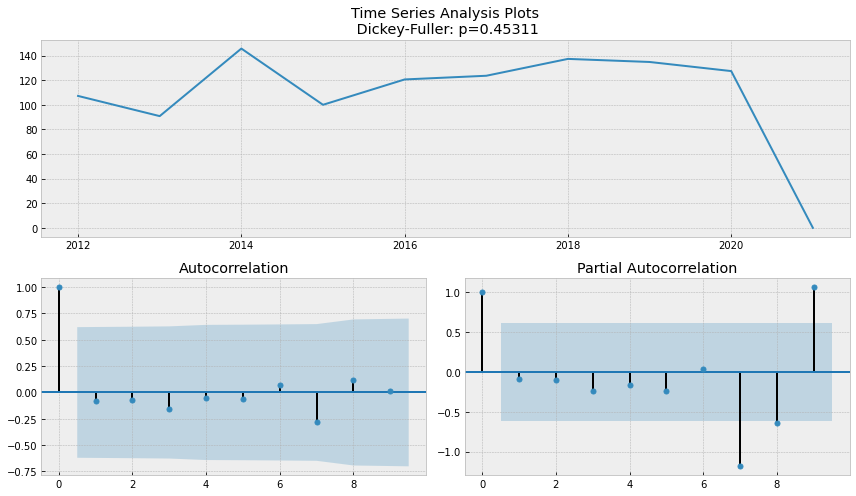

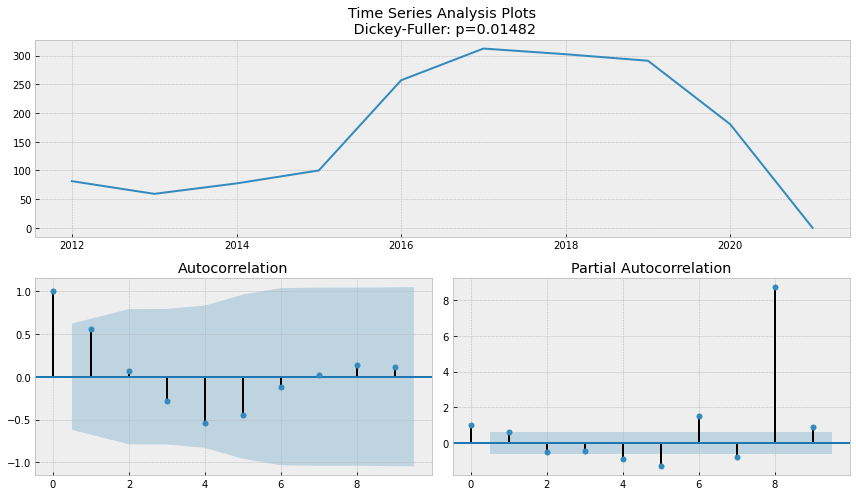

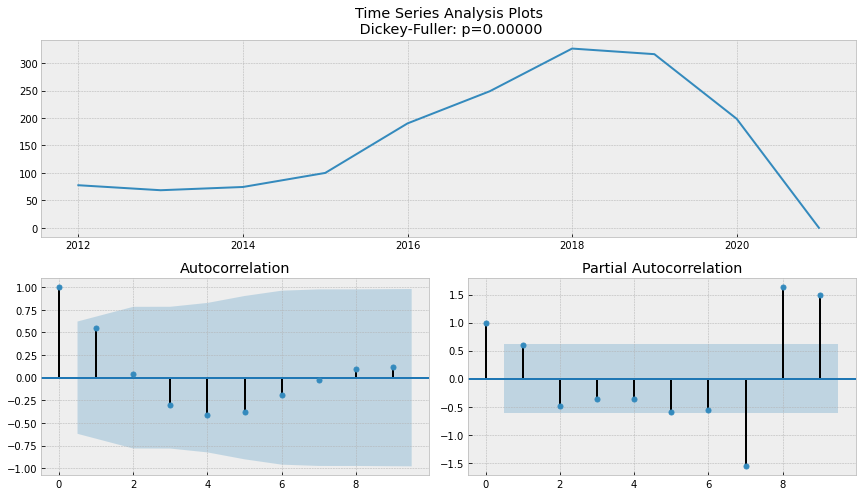

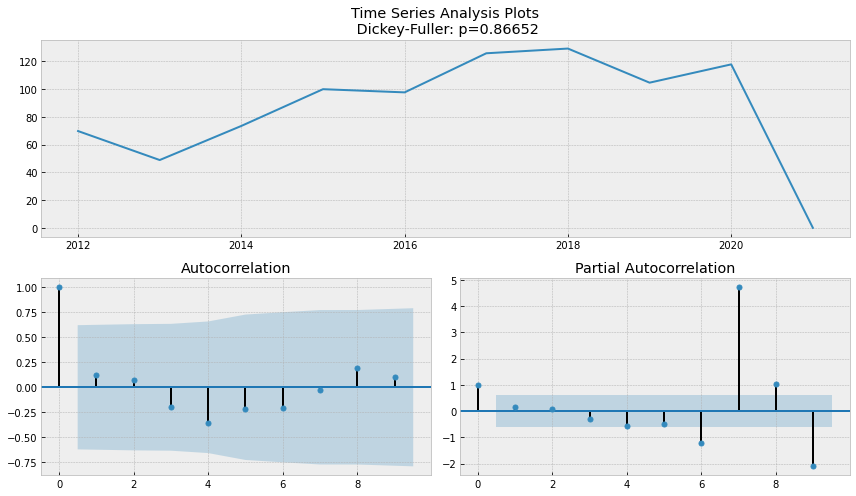

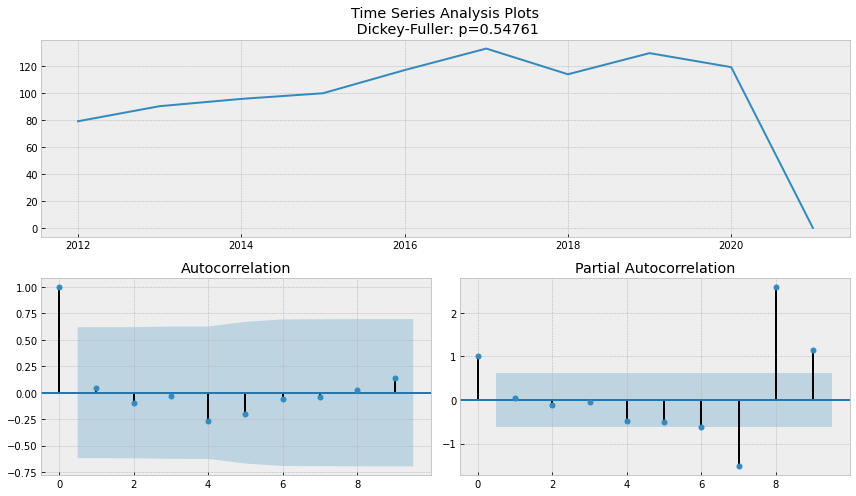

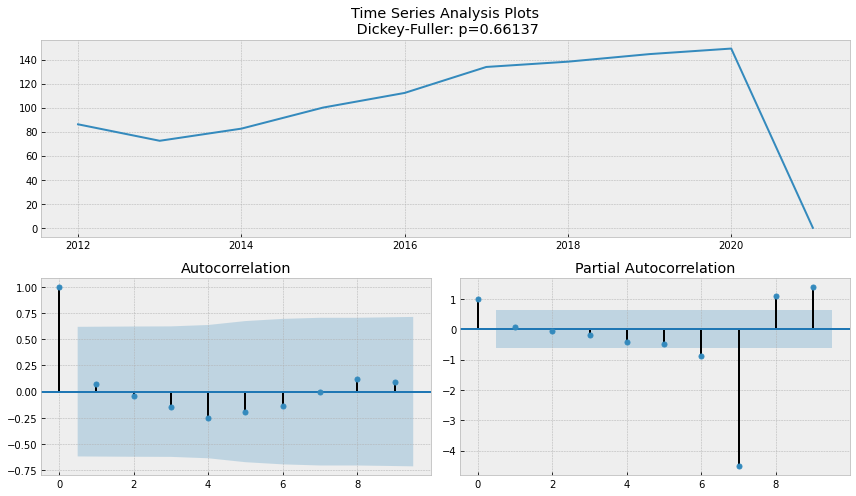

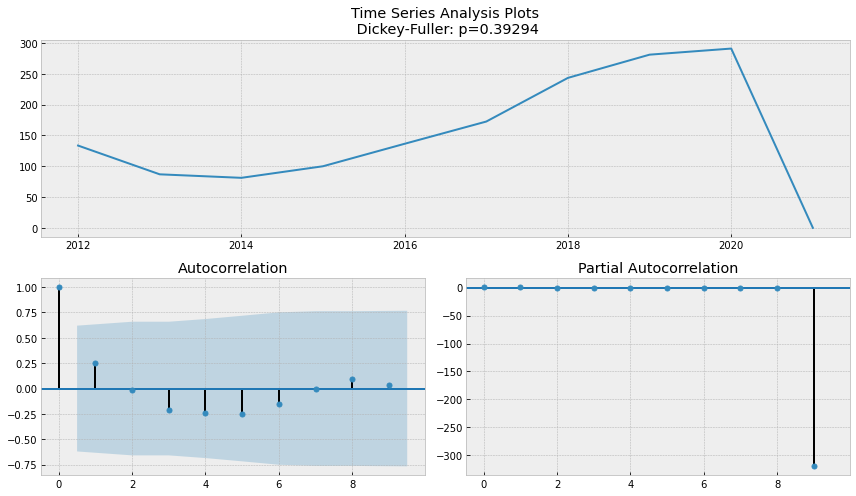

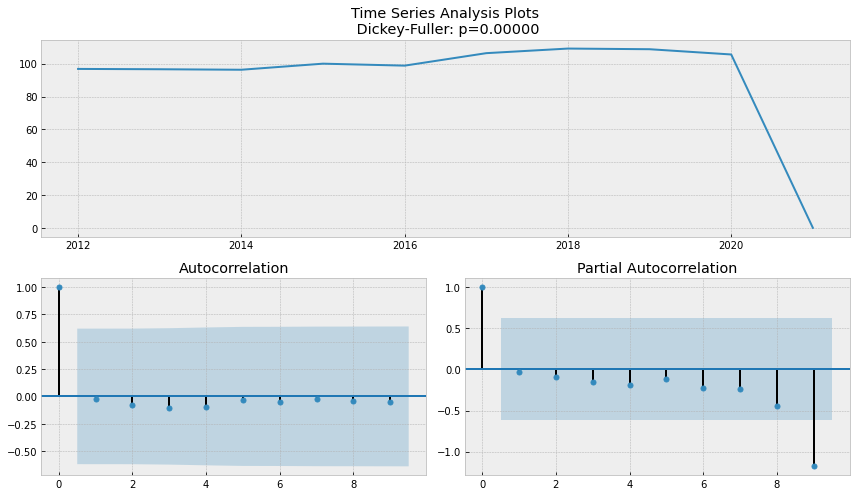

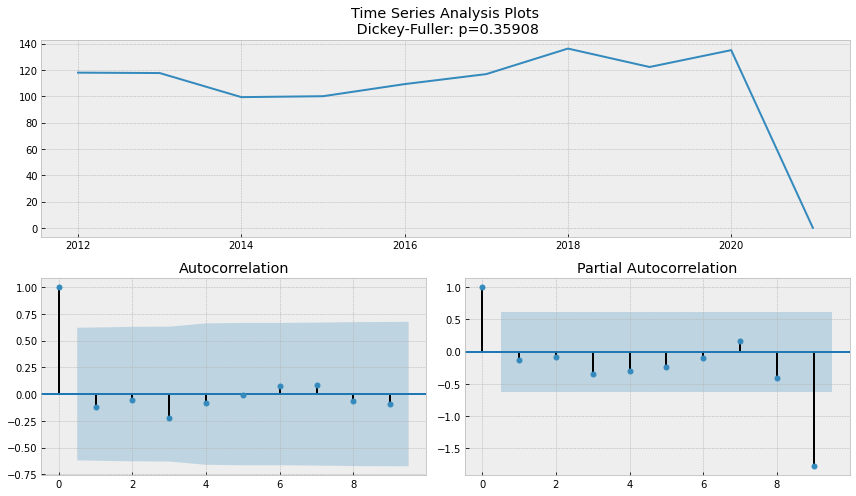

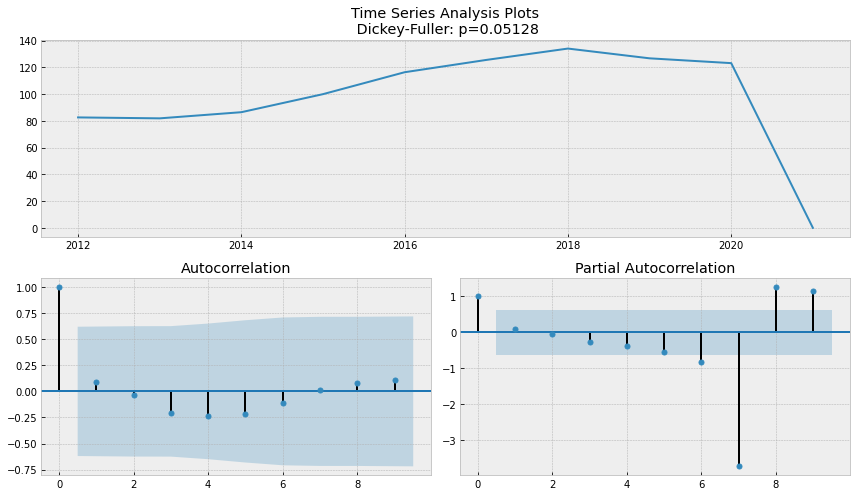

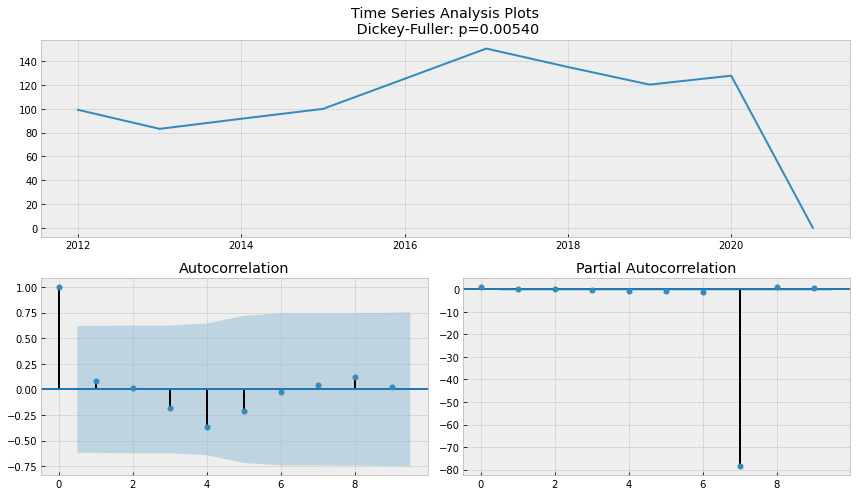

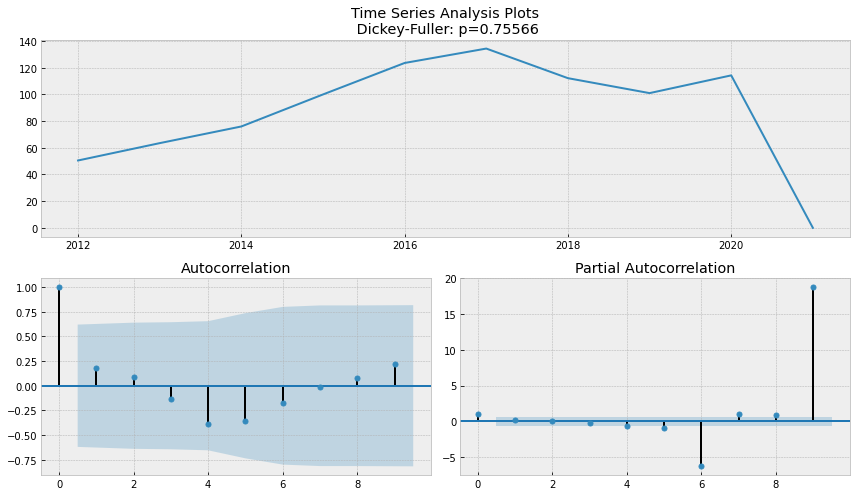

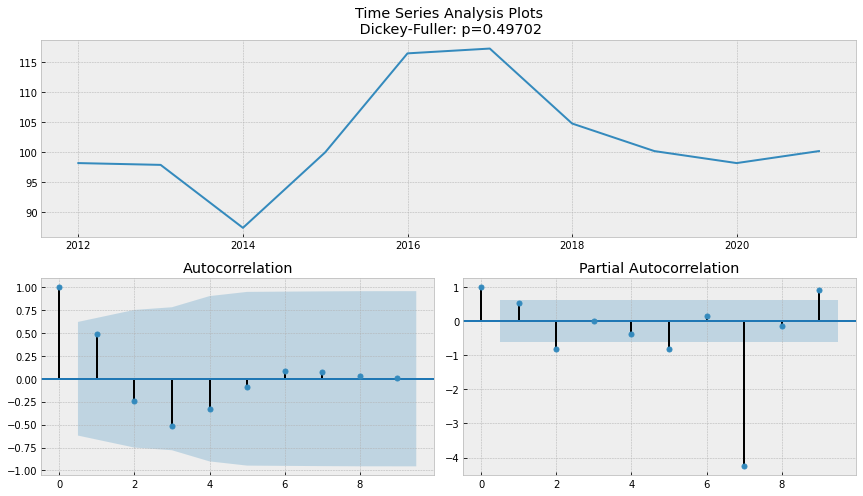

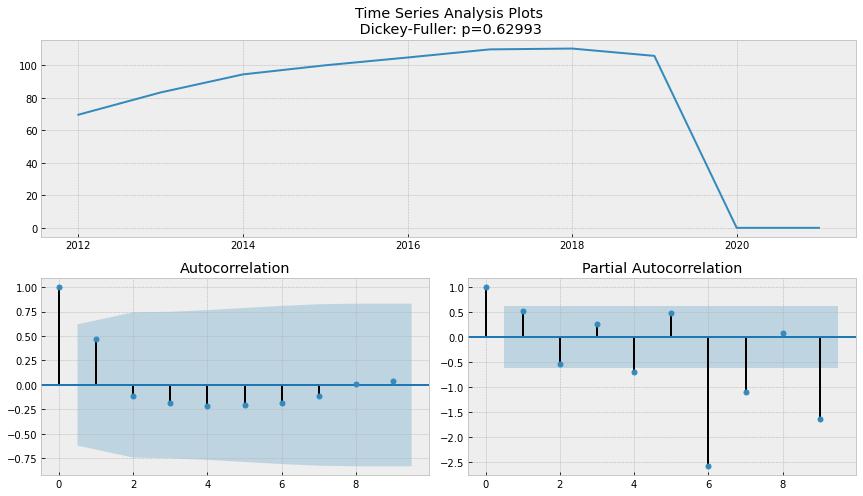

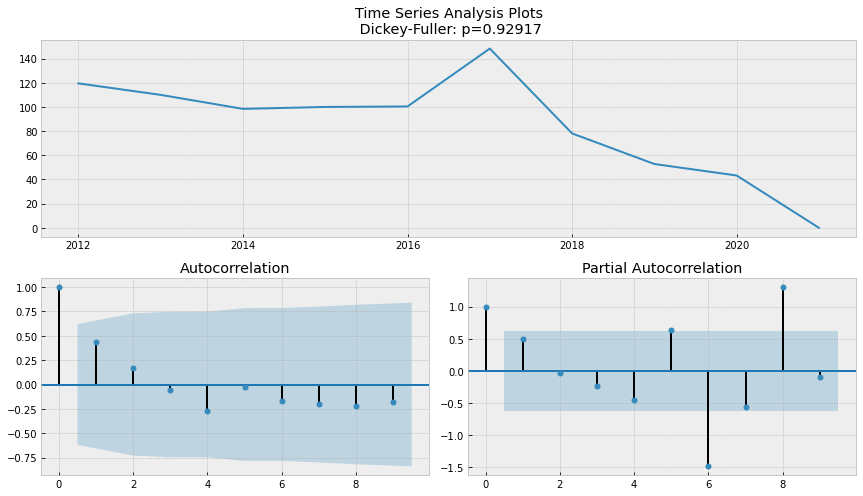

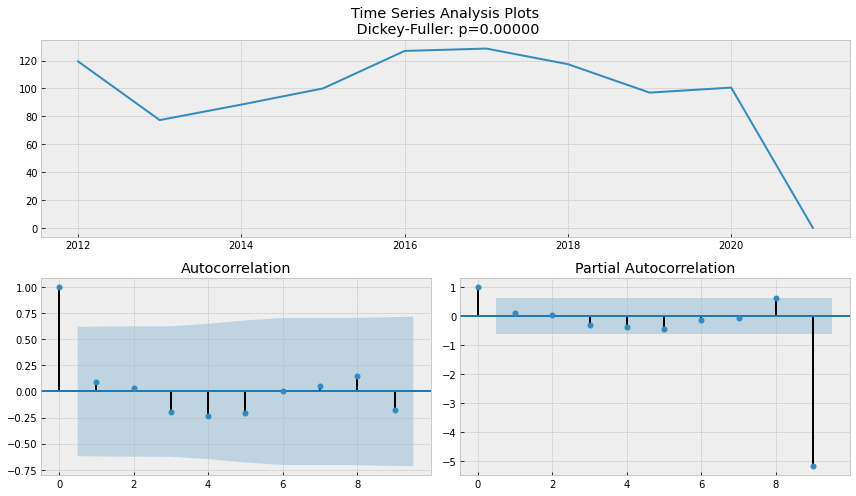

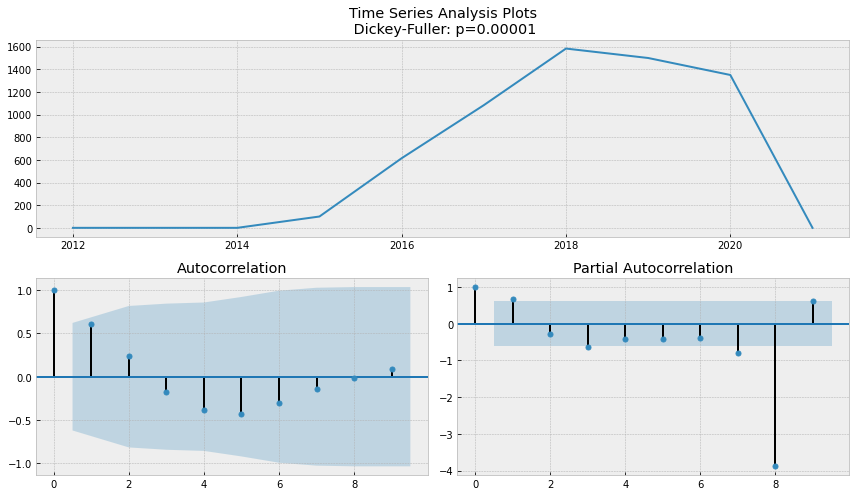

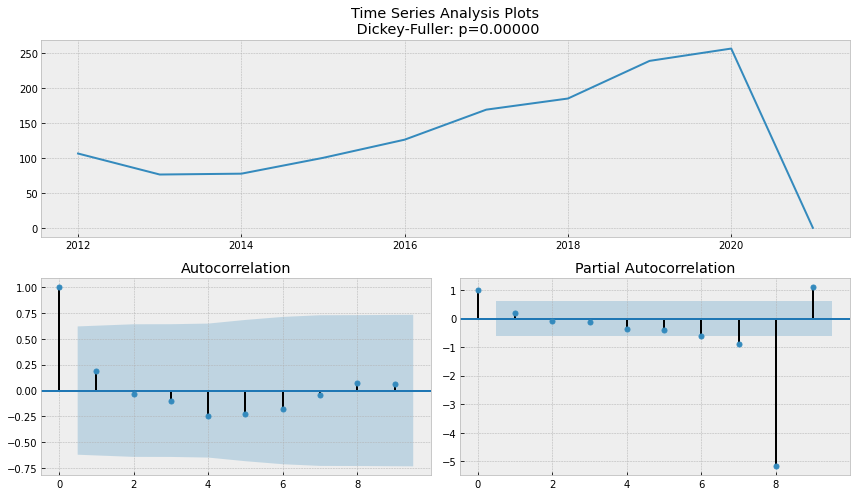

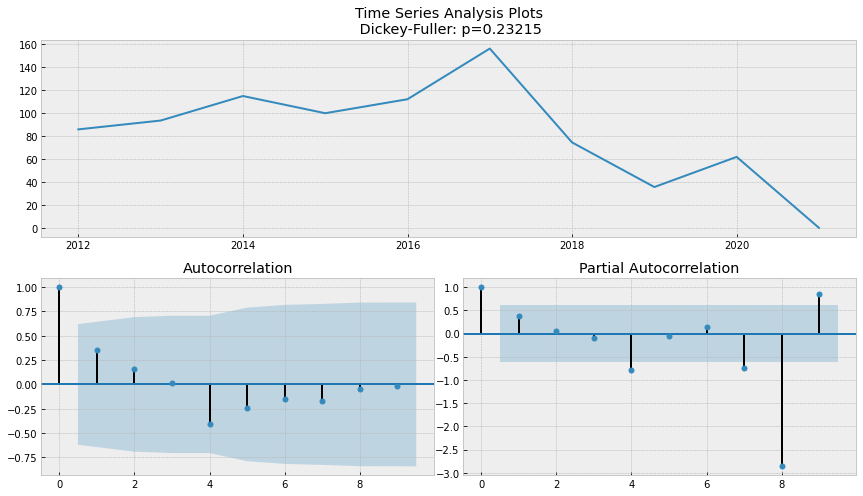

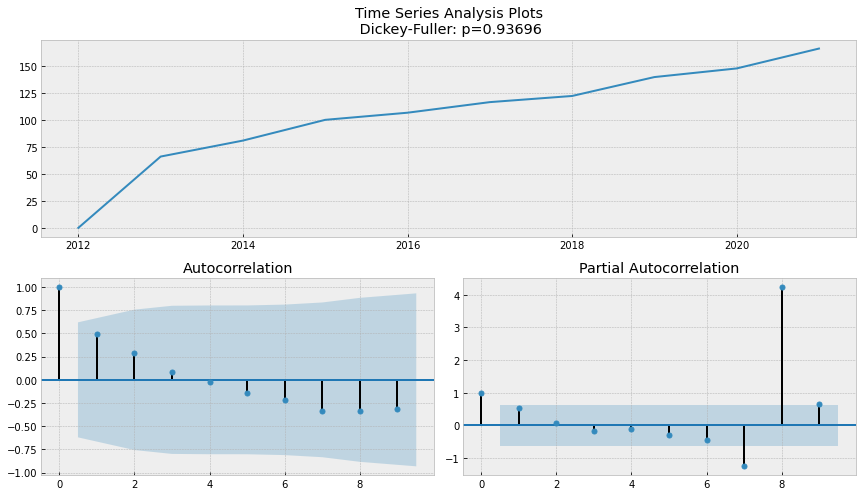

In [ ]:
## Plotting Pearson Coefficient for Building Permits + Construction Volume
%matplotlib inline
import tqdm
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 
for i in areas:
  tsplot(permits[i])